In [397]:
cd C:\Users\patri\Documents\ESILV\machine_learning\project

C:\Users\patri\Documents\ESILV\machine_learning\project


# 1) load data and clean

In [398]:
import pandas as pd
import os 
path_train="C:/Users/patri/Documents/ESILV/machine_learning/project/python_projetTrain.csv"
path_valid="C:/Users/patri/Documents/ESILV/machine_learning/project/python_projetValid.csv"

In [399]:
data_train = pd.DataFrame.from_csv(path_train)
data_valid = pd.DataFrame.from_csv(path_valid)

In [400]:
data_train.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,target
1,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,1
2,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,0
3,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,1
4,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,1
5,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,1


In [401]:
data_valid.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
1,70893,1,A8,26,0.076923,2,3,1,0.776119,0.654545,...,0,0,0,0,0,0,0,0,0,0
2,20997,1,D2,26,0.076923,2,3,1,0.552239,0.818182,...,0,0,0,0,0,0,0,0,0,1
3,29427,1,D3,10,0.230769,2,3,1,0.208955,0.636364,...,0,0,0,0,0,0,0,0,0,0
4,45161,1,A1,26,0.256410,2,3,1,0.328358,0.745455,...,0,0,0,0,0,0,0,0,0,0
5,71802,1,D3,26,0.282051,2,3,1,0.686567,0.781818,...,0,0,0,1,0,0,0,0,0,0


## 1.1) combine projetTrain and projetValid without target for handle missing data

In [402]:
data=data_train.iloc[:,:len(data_train.columns)-1].append(data_valid)

In [403]:
sum(data.isnull().values.ravel()) # number of NA

393103

<span style="color:red">
Vous auriez pu utiliser les fonctions de pandas qui calculent directement ce genre de choses <br>
nb_nul_par_colonne = projetTrain.isnull().sum()<br>
nb_ligne                = projetTrain.shape[0]<br>
pct_vide_par_colonne    = (nb_nul_par_colonne/nb_ligne)<br>
colonnes_avec_des_nuls  = pct_vide_par_colonne[pct_vide_par_colonne>0]<br>
limite_de_vide      = 50/100<br>
colonnes_a_eliminer = colonnes_avec_des_nuls[colonnes_avec_des_nuls<br> >limite_de_vide]
projetTrain = projetTrain.drop(colonnes_a_eliminer.keys(), axis=1)<br>
</span>

In [404]:
col_nam=list(data)
data_na=pd.DataFrame([{'id':1}])

for i in col_nam[1:]:
    data_na[i]=sum(data[i].isnull().values.ravel())
for i in col_nam[1:]:
    if not data_na[i].any(): # verify if data_na==0
        del data_na[i]
data_na=data_na.iloc[:,1:] # delete the first column id


In [405]:
data_na=data_na.append(round(data_na/len(data.index)*100,2))

In [406]:
data_na

,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_10,Medical_History_15,Medical_History_24,Medical_History_32
0,19.00,6779.00,10854.00,25396.00,28656.00,34241.00,19184.00,41811.00,8889.00,58824.00,44596.0,55580.0,58274.00
0,0.03,11.42,18.28,42.77,48.26,57.66,32.31,70.41,14.97,99.06,75.1,93.6,98.14


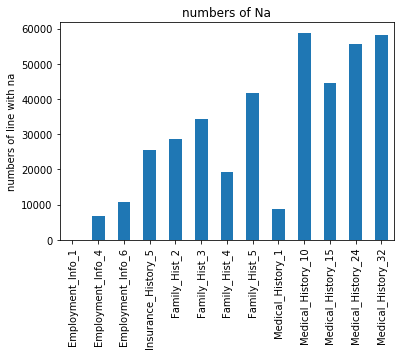

In [457]:
import numpy as np 
import matplotlib.pyplot as plt

data_na.iloc[0,:].plot(kind='bar',title='numbers of Na')
plt.ylabel('numbers of line with na')
plt.show()

In [408]:
temp=pd.DataFrame()
for i in list(data_na):
    temp[i]=data[i]
for i in range(0,len(data_na.columns)):
    temp.iloc[:,i]=-(temp.iloc[:,i].isnull()*(i+1)-(i+1))

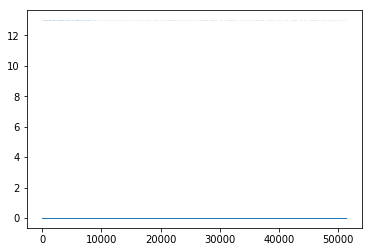

In [409]:
plt.scatter(temp.index.values,temp.iloc[:,12].values,s=0.0001)
plt.show()

In [410]:
temp.iloc[:,1].values

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [411]:
temp.index.values

array([   1,    2,    3, ..., 7998, 7999, 8000], dtype=int64)

### 1.1.1) All columns with more than 98% of missin has been deleted 

In [412]:
#for i in list(data_na):
#    if (data_na[i][1:]>98).bool():
#        del data[i]
#        del data_na[i]

### 1.1.2) Replace missing value with scikit learn

In [413]:
from sklearn.preprocessing import Imputer

# impute the data with respect of column product info 2

for i in list(data['Product_Info_2'].unique()):
    for j in list(data_na):
        data.loc[data['Product_Info_2']==i,j]=data.loc[data['Product_Info_2']==i,j].fillna(0)+data.loc[data['Product_Info_2']==i,j].isnull()*data.loc[data['Product_Info_2']==i,j].median()

# impute the others data with imputer
temp=pd.DataFrame()
for i in list(data_na):
    temp[i]=data[i]

imp=Imputer(missing_values='NaN',strategy='median',axis=0)
temp=imp.fit_transform(temp)
temp=pd.DataFrame(temp)
temp.columns=list(data_na)

for i in list(data_na):
    data[i]=temp[i]

## 1.2) transform str column in numerical column 

In [414]:
for i in list(data['Product_Info_2'].unique()):
    data[i]=(data['Product_Info_2']==i)*1 # for each i create new colum with 1 and 0

In [415]:
data.shape

(59381, 146)

In [416]:
del data['Product_Info_2'] # delete 

### 1.3) separate data in train, cross validation, test and valid data set. 

In [417]:
data_train2=data.iloc[:len(data_train),:]
data_valid2=data.iloc[len(data_train):,:]

In [418]:
data_train2.shape

(51381, 145)

In [419]:
data_valid2.shape

(8000, 145)

In [420]:
frames=[data_train2,data_train['target']]
data_train2=pd.concat(frames,axis=1,join='inner')

In [421]:
data_train2.shape

(51381, 146)

In [422]:
dtrain=data_train2.sample(round(len(data_train2)*0.7))
dtest=data_train2.drop(dtrain.index)
dcv=dtest.sample(round(len(dtest)*0.48))
dtest=dtest.drop(dcv.index)

In [423]:
dtrain.shape

(35967, 146)

In [424]:
dcv.shape

(7399, 146)

In [425]:
dtest.shape

(8015, 146)

## 1.4) standardization of data sets

<span style="color:red">
Vous auriez pu utiliser les fonctions de pandas qui calculent directement ce genre de choses <br>
from sklearn.preprocessing import StandardScaler <br>
sc = StandardScaler() <br>
sc.fit(X_train) <br>
X_train_std = sc.transform(X_train) <br>
X_test_std = sc.transform(X_test)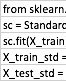 <br>
</span>


In [426]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(dtrain.iloc[:,1:len(dtrain.columns)-1]) # without target and id
dtrainS=pd.DataFrame(scaler.transform(dtrain.iloc[:,1:len(dtrain.columns)-1])) # without target and id
dcvS=pd.DataFrame(scaler.transform(dcv.iloc[:,1:len(dtrain.columns)-1]))
dtestS=pd.DataFrame(scaler.transform(dtest.iloc[:,1:len(dtrain.columns)-1]))

dvalS=pd.DataFrame(scaler.transform(data_valid2.iloc[:,1:]))

dtrainS.columns=list(data_valid2.iloc[:,1:].columns)
dcvS.columns=list(data_valid2.iloc[:,1:].columns)
dtestS.columns=list(data_valid2.iloc[:,1:].columns)
dvalS.columns=list(data_valid2.iloc[:,1:].columns)

In [427]:
Xtrain=dtrainS
Xcv=dcvS
Xtest=dtestS
Xval=dvalS
ytrain=dtrain.iloc[:,len(dtrain.columns)-1]
ycv=dcv.iloc[:,len(dtest.columns)-1]
ytest=dtest.iloc[:,len(dtest.columns)-1]

# 2) Logistic regression


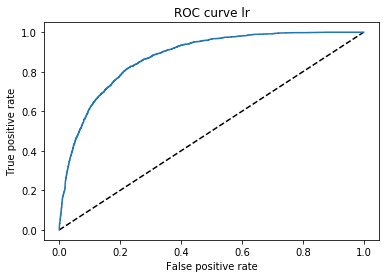

In [428]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# penalty is chooseen only between l2 and l1. high value of c allow to reduce the effect of regularisation
lr = LogisticRegression(penalty='l2',C=1e6, fit_intercept=False).fit(Xtrain, ytrain)#By default, sklearn solves regularized LogisticRegression, with fitting strength C=1 (small C-big regularization, big C-small regularization).
yhat = lr.predict_proba(Xtest)[:,1]

fpr_lr, tpr_lr, thresholds = metrics.roc_curve(ytest, yhat, pos_label=1)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='lr')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve lr')
plt.show()


In [429]:
print(metrics.auc(fpr_lr, tpr_lr))

0.875319169917


## Features importances

<span style="color:red">
Pourquoi calculer un MSE sur une classification ? <br>
vos noms de variables sont trop sibillynes : je n'arrive pas à vous suivre.
</span>


In [178]:
from scipy import stats

params = np.append(lr.intercept_,lr.coef_)
predictions = lr.predict_proba(Xtrain)[:,1]

newX = pd.DataFrame({"Constant":np.ones(len(Xtrain))}).join(pd.DataFrame(Xtrain))
MSE = (sum((ytrain-predictions)**2))/(len(newX)-len(newX.columns))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,6)
params = np.round(params,3)

features=Xtrain.columns
features=features.insert(0,"Intercept")

myDF3=pd.DataFrame()
myDF3["features importances"],myDF3["Coef"],myDF3["StdErrors"],myDF3["t values"],myDF3["Probabilites"] = [features,abs(params),sd_b,ts_b,p_values]

myDF3_s=myDF3.sort_values(by=['Coef'],ascending=False)
myDF3_s.head(30)

,features importances,Coef,StdErrors,t values,Probabilites
10,BMI,1.405,0.017,-84.498,0.000000
9,Wt,0.650,0.021,31.213,0.000000
40,Medical_History_4,0.434,0.002,181.023,0.000000
8,Ht,0.356,0.011,-31.419,0.000000
90,Medical_Keyword_15,0.248,0.005,-49.489,0.000000
58,Medical_History_23,0.245,0.005,46.133,0.000000
22,InsuredInfo_6,0.233,0.004,65.805,0.000000
65,Medical_History_30,0.202,0.003,-74.816,0.000000
3,Product_Info_4,0.198,0.003,78.878,0.000000
132,A7,0.178,17499.817,-0.000,0.999992


# 3) Decision tree classifier

<span style="color:red">
Vous ne pouvez pas prendre les ènèmes lignes pour faire votre train : vous allez dépendre de l'ordre des variables en entrée ! il faut une sélection aléatoire, appuyez vous sur les outils de scikit learn : sklearn.model_selection.train_test_split
</span>


In [466]:
temp_Xtrain=Xtrain.iloc[:6000,:]
temp_ytrain=ytrain[:6000]

In [478]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz

tree_clf = DecisionTreeClassifier(criterion='gini', splitter='best', 
                max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                min_weight_fraction_leaf=0.0, max_features=None, random_state=None, 
                max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                  class_weight=None, presort=False).fit(temp_Xtrain, temp_ytrain[:6000])

dot_data = tree.export_graphviz(tree_clf, feature_names=Xtrain.columns,rounded=True,
                                out_file='tree.dot',filled=True)
graph = graphviz.Source(dot_data) 

In [468]:
graph

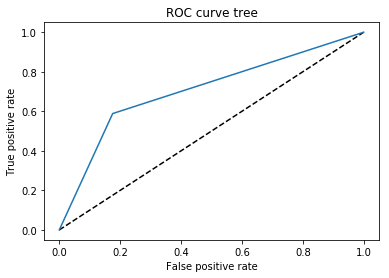

In [480]:
yhatr = tree_clf.predict_proba(Xtest)[:,1]

fpr_tr, tpr_tr, thresholds = metrics.roc_curve(ytest, yhatr, pos_label=1)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_tr, tpr_tr, label='lr')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve tree')
plt.show()

In [191]:
print(metrics.auc(fpr_tr, tpr_tr))

0.733063166089


# 4) Elastic net 

## 4.1) selection of parameters l1_ratio and alpha with cross validation data 

penalized parameter is given by:
alpha (l1_ratio * ||w||_1 + 0.5* (1 - l1_ratio) * ||w||^2_2)
l1_ratio allow to select a ratio between lasso(||w||_1) and ridge(||w||_2).


<span style="color:red">
il faut faire un n_jobs=-1, pas 1, pour profiter des multi cpus.
</span>


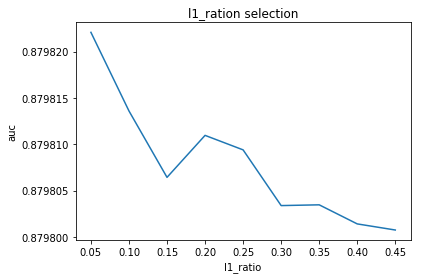

In [72]:
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics

res=pd.DataFrame()


for i in range(1,10):
    encv=ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=i/20, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto', random_state=0,
       selection='cyclic', tol=0.0001, verbose=0)

    fpr, tpr, thresholds = metrics.roc_curve(ycv, encv.fit(Xtrain, ytrain).predict(Xcv), pos_label=1)
    res=res.append(pd.DataFrame([{'l1_ratio':i/20,'alpha':encv.alpha_,'auc':metrics.auc(fpr, tpr)}]))

plt.figure(1)
plt.plot(res['l1_ratio'], res['auc'] , label='l1-ratio_sel')
plt.xlabel('l1_ratio')
plt.ylabel('auc')
plt.title('l1_ration selection')
plt.show()

In [71]:
res

,alpha,auc,l1_ratio
0,0.011709,0.879822,0.05
0,0.008298,0.879814,0.10
0,0.006361,0.879806,0.15
0,0.005115,0.879811,0.20
0,0.004092,0.879809,0.25
0,0.003410,0.879803,0.30
0,0.002923,0.879803,0.35
0,0.002558,0.879801,0.40
0,0.002273,0.879801,0.45


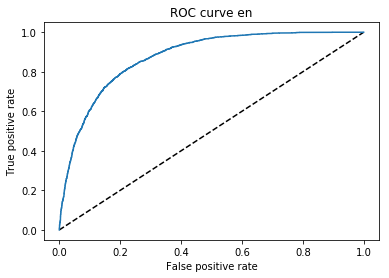

In [37]:
from sklearn.linear_model import ElasticNet
from sklearn import metrics
alpha = 0.011709
l1_ratio=0.05

enet = ElasticNet(alpha=alpha, copy_X=True, fit_intercept=True, l1_ratio=l1_ratio,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

# roc curve 
y_pred=enet.fit(Xtrain,ytrain).predict(Xtest)
fpr_en, tpr_en, thresholds = metrics.roc_curve(ytest,pd.DataFrame(y_pred))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='en')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve en')
plt.show()

In [38]:
print(metrics.auc(fpr_en, tpr_en)) 

0.87641375802


## 4.2) Elastic Net classifier 

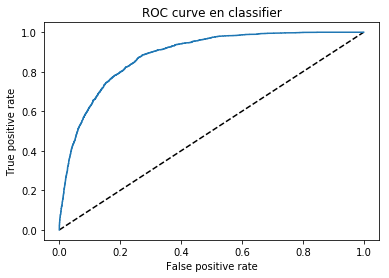

In [481]:
import numpy as np
from sklearn import linear_model
from sklearn import metrics

# loss='log' give logistic regression 
#penalty='elasticnet' for elasticnet penalization
#alpha and l1_ratio is calculated above
clf=linear_model.SGDClassifier(alpha=0.011709, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.05,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=0.001, verbose=0, warm_start=False)

y_pred_enet_cl = clf.fit(Xtrain, ytrain).predict(Xtest)

fpr_encl, tpr_encl, thresholds = metrics.roc_curve(ytest, pd.DataFrame(y_pred_enet_cl), pos_label=1)

# roc curve 
y_pred=clf.fit(Xtrain,ytrain).predict_proba(Xtest)[:, 1]
fpr_encl, tpr_encl, thresholds = metrics.roc_curve(ytest,y_pred)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_encl, tpr_encl, label='en classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve en classifier')
plt.show()
                      

In [476]:
print(metrics.auc(fpr_encl, tpr_encl)) 

0.882972855335


### Comparaison between elasticnet regression and elasticnet classification

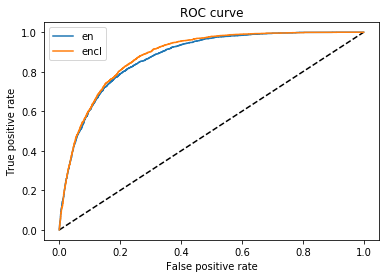

In [39]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_en, tpr_en, label='en')
plt.plot(fpr_encl, tpr_encl, label='encl')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# 5) Random Forest Classifier

## 5.1) selection Max_features with cross validation data

This parameter is the maximum number of features is allowed to try or consider in individual tree. 

<span style="color:red">
Vous pourriez travailler sur les différents paramètres avec une grid search et affiner au fur et à mesure les valeurs de la grille.
</span>


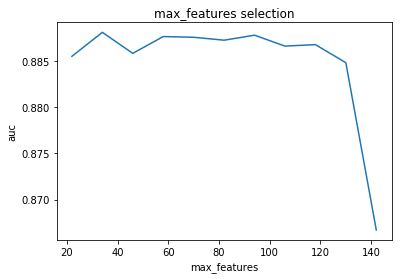

In [39]:
# selection of max_features

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

res_rf1=pd.DataFrame()

for m_fea in range(22,143,12):
    rf1=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=m_fea, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False).fit(Xtrain,ytrain)
    yrf1=rf1.predict_proba(Xcv)[:, 1]
    fpr_rf1, tpr_rf1, thresholds = metrics.roc_curve(ycv, yrf1, pos_label=1)

    res_rf1=res_rf1.append(pd.DataFrame([{'max_features':m_fea,'auc':metrics.auc(fpr_rf1, tpr_rf1)}]))
    
plt.figure(1)
plt.plot(res_rf1['max_features'], res_rf1['auc'] )
plt.xlabel('max_features')
plt.ylabel('auc')
plt.title('max_features selection')
plt.show()

In [40]:
res_rf1

,auc,max_features
0,0.885487,22
0,0.888081,34
0,0.885810,46
0,0.887624,58
0,0.887549,70
0,0.887231,82
0,0.887773,94
0,0.886593,106
0,0.886751,118
0,0.884798,130


### max_features = 60

## 5.2) selection of n_estimators with cross validation data

This parameters is the numbers of trees to build before taking the maximum voting or averages of predictions. High number of trees give better performance but makes the codes slower. 

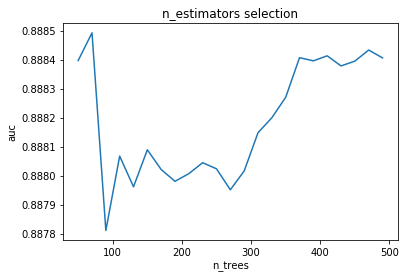

In [41]:
# selection of numbers of trees in the forest n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

res_rf2=pd.DataFrame()

for n_trees in range(50,500,20):
    rf2=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=60, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=n_trees, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False).fit(Xtrain,ytrain)
    yrf2=rf2.predict_proba(Xcv)[:,1]
    fpr_rf2, tpr_rf2, thresholds = metrics.roc_curve(ycv, yrf2, pos_label=1)

    res_rf2=res_rf2.append(pd.DataFrame([{'n_estimators':n_trees,'auc':metrics.auc(fpr_rf2, tpr_rf2)}]))
    
plt.figure(1)
plt.plot(res_rf2['n_estimators'], res_rf2['auc'] )
plt.xlabel('n_trees')
plt.ylabel('auc')
plt.title('n_estimators selection')
plt.show()

In [42]:
res_rf2

,auc,n_estimators
0,0.888399,50
0,0.888494,70
0,0.887812,90
0,0.888069,110
0,0.887963,130
0,0.888091,150
0,0.888023,170
0,0.887982,190
0,0.888008,210
0,0.888046,230


Influence in auc is not important for n_estimators between 50 and 500. 
### we choose n_estimators = 50 

## 5.3) selection of Max_depth with cross validation data

This parameter is the maximum depth of the tree. The default parameter "None" means that the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

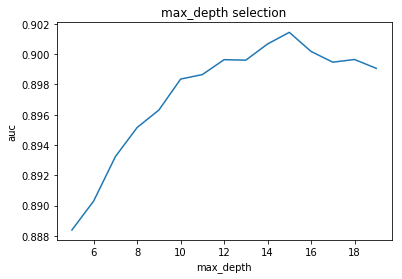

In [43]:
# selection of parameter max_depth 
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

res_rf3=pd.DataFrame()

for max_depth in range(5,20):
    rf3=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=max_depth, max_features=60, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False).fit(Xtrain,ytrain)

    yrf3=rf3.predict_proba(Xcv)[:,1]
    fpr_rf3, tpr_rf3, thresholds = metrics.roc_curve(ycv, yrf3, pos_label=1)

    res_rf3=res_rf3.append(pd.DataFrame([{'max_depth':max_depth,'auc':metrics.auc(fpr_rf3, tpr_rf3)}]))
    
plt.figure(1)
plt.plot(res_rf3['max_depth'], res_rf3['auc'] )
plt.xlabel('max_depth')
plt.ylabel('auc')
plt.title('max_depth selection')
plt.show()

In [44]:
res_rf3

,auc,max_depth
0,0.888399,5
0,0.890309,6
0,0.893241,7
0,0.895162,8
0,0.896313,9
0,0.898356,10
0,0.898654,11
0,0.899636,12
0,0.899606,13
0,0.900672,14


max_depth = 15 gives the best auc 

## 5.4) Random Forest Roc curve and festures importance with data test

rf_cl.set_params

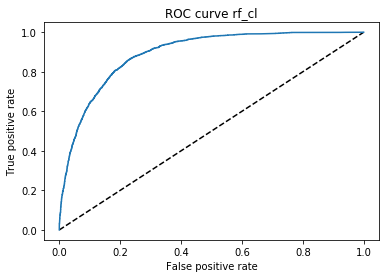

In [482]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rf_cl=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=60, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False).fit(Xtrain,ytrain)

yrf_cl=rf_cl.predict_proba(Xtest)[:, 1]
fpr_rf_cl, tpr_rf_cl, thresholds = metrics.roc_curve(ytest, yrf_cl, pos_label=1)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_cl, tpr_rf_cl, label='lr')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve rf_cl')
plt.show()

In [41]:
print(metrics.auc(fpr_rf_cl, tpr_rf_cl)) 

0.894220647611


In [42]:
feat_imp=pd.DataFrame(rf_cl.feature_importances_)
feat_imp.columns=['importances']
feat_imp.index=range(1,len(feat_imp)+1)
feat_imp['features']=list(Xtrain.columns)
feat_imp=feat_imp.sort_values(by=['importances'],ascending=False)
feat_imp

,importances,features
10,0.218453,BMI
9,0.102816,Wt
40,0.091976,Medical_History_4
58,0.064340,Medical_History_23
90,0.061879,Medical_Keyword_15
3,0.044743,Product_Info_4
7,0.040695,Ins_Age
22,0.018700,InsuredInfo_6
11,0.017801,Employment_Info_1
38,0.016375,Medical_History_2


In [43]:
feat_imp.set_index('features',inplace=True) # To take features like index

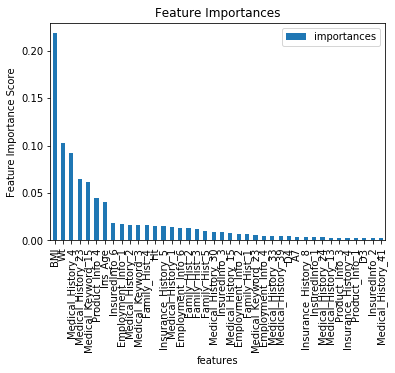

In [44]:
feat_imp.iloc[:40,:].plot(kind='bar',title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

# 6) Gbm classifier 

## 6.0) loss function selection

Two choice can be made: 'deviance' for classification logistic regression or 'exponential' for gradient boosting recovers(AdaBoost algorithm)

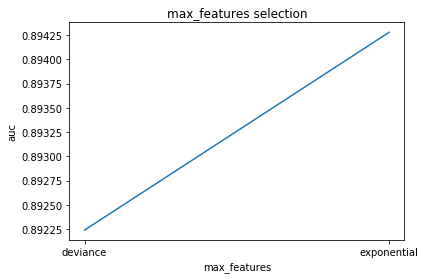

In [52]:
# selection of max_features

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

res_gbm0=pd.DataFrame()
loss=['deviance','exponential']
for los in loss:
    gbm0=GradientBoostingClassifier(loss=los, learning_rate=0.1, 
            n_estimators=50, subsample=1.0, criterion='friedman_mse', 
            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
            max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
            random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto').fit(Xtrain,ytrain)
    ygbm0=gbm0.predict_proba(Xtest)[:, 1]
    fpr_gbm0, tpr_gbm0, thresholds = metrics.roc_curve(ytest, ygbm0, pos_label=1)

    res_gbm0=res_gbm0.append(pd.DataFrame([{'loss':los,'auc':metrics.auc(fpr_gbm0, tpr_gbm0)}]))
    
plt.figure(1)
plt.plot(res_gbm0['loss'], res_gbm0['auc'] )
plt.xlabel('max_features')
plt.ylabel('auc')
plt.title('max_features selection')
plt.show()

## 6.1) selection of  max_features with cross validation data

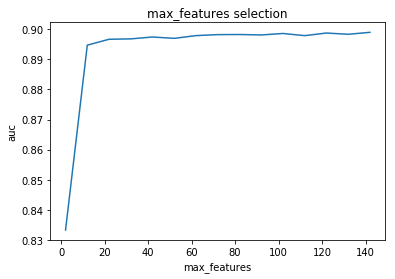

In [47]:
# selection of max_features

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

res_gbm1=pd.DataFrame()

for m_fea in range(2,143,10):
    gbm1=GradientBoostingClassifier(loss='exponential', learning_rate=0.1, 
            n_estimators=50, subsample=1.0, criterion='friedman_mse', 
            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
            max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
            random_state=None, max_features=m_fea, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto').fit(Xtrain,ytrain)
    ygbm1=gbm1.predict_proba(Xcv)[:, 1]
    fpr_gbm1, tpr_gbm1, thresholds = metrics.roc_curve(ycv, ygbm1, pos_label=1)

    res_gbm1=res_gbm1.append(pd.DataFrame([{'max_features':m_fea,'auc':metrics.auc(fpr_gbm1, tpr_gbm1)}]))
    
plt.figure(1)
plt.plot(res_gbm1['max_features'], res_gbm1['auc'] )
plt.xlabel('max_features')
plt.ylabel('auc')
plt.title('max_features selection')
plt.show()

In [48]:
res_gbm1

,auc,max_features
0,0.833377,2
0,0.894661,12
0,0.896617,22
0,0.896746,32
0,0.897364,42
0,0.896921,52
0,0.897829,62
0,0.898157,72
0,0.898193,82
0,0.898049,92


## 6.2) selection of min_samples_split

The minimun number of samples required to split an internal node. Used to control over-fitting. 
higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree
Too high values can lead to under-fitting. 

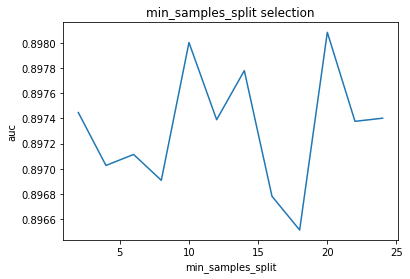

In [49]:
# selection of min_samples_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

res_gbm2=pd.DataFrame()

for min_samples_split in range(2,25,2):
    gbm2=GradientBoostingClassifier(loss='exponential', learning_rate=0.1, 
            n_estimators=50, subsample=1.0, criterion='friedman_mse', 
            min_samples_split=min_samples_split, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
            max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
            random_state=None, max_features=42, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto').fit(Xtrain,ytrain)
    ygbm2=gbm2.predict_proba(Xcv)[:, 1]
    fpr_gbm2, tpr_gbm2, thresholds = metrics.roc_curve(ycv, ygbm2, pos_label=1)

    res_gbm2=res_gbm2.append(pd.DataFrame([{'min_samples_split':min_samples_split,'auc':metrics.auc(fpr_gbm2, tpr_gbm2)}]))
    
plt.figure(1)
plt.plot(res_gbm2['min_samples_split'], res_gbm2['auc'] )
plt.xlabel('min_samples_split')
plt.ylabel('auc')
plt.title('min_samples_split selection')
plt.show()

In [50]:
res_gbm2

,auc,min_samples_split
0,0.897447,2
0,0.897027,4
0,0.897114,6
0,0.896909,8
0,0.898003,10
0,0.897390,12
0,0.897780,14
0,0.896782,16
0,0.896514,18
0,0.898084,20


## 6.3) max_depth selection

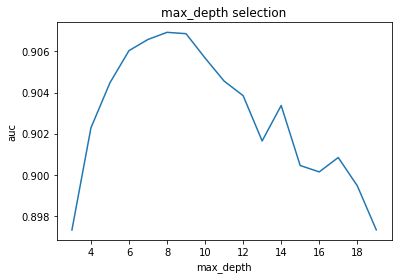

In [52]:
# selection of max_depth

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

res_gbm3=pd.DataFrame()

for max_depth in range(3,20):
    gbm3=GradientBoostingClassifier(loss='exponential', learning_rate=0.1, 
            n_estimators=50, subsample=1.0, criterion='friedman_mse', 
            min_samples_split=10, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
            max_depth=max_depth, min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
            random_state=None, max_features=60, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto').fit(Xtrain,ytrain)
    ygbm3=gbm3.predict_proba(Xcv)[:, 1]
    fpr_gbm3, tpr_gbm3, thresholds = metrics.roc_curve(ycv, ygbm3, pos_label=1)

    res_gbm3=res_gbm3.append(pd.DataFrame([{'max_depth':max_depth,'auc':metrics.auc(fpr_gbm3, tpr_gbm3)}]))
    
plt.figure(1)
plt.plot(res_gbm3['max_depth'], res_gbm3['auc'] )
plt.xlabel('max_depth')
plt.ylabel('auc')
plt.title('max_depth selection')
plt.show()

In [53]:
res_gbm3

,auc,max_depth
0,0.897316,3
0,0.902284,4
0,0.904477,5
0,0.906038,6
0,0.906582,7
0,0.906928,8
0,0.906862,9
0,0.905679,10
0,0.904557,11
0,0.903850,12


Max_depth = 8

## 6.4) selection of subsample with cross validation data

The fraction of sample to be used for fitting each tree. Smaller than 1.0 allow the selection to be done by random sampling. choosing subsample<1 leads to a reduction of variance and an increase in bias.

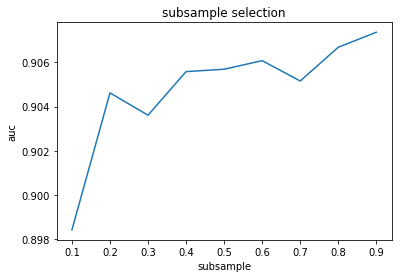

In [54]:
# selection of subsample

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

res_gbm4=pd.DataFrame()

for subsample in range(1,10):
    gbm4=GradientBoostingClassifier(loss='exponential', learning_rate=0.1, 
            n_estimators=50, subsample=subsample/10, criterion='friedman_mse', 
            min_samples_split=10, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
            max_depth=8, min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
            random_state=None, max_features=60, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto').fit(Xtrain,ytrain)
    ygbm4=gbm4.predict_proba(Xcv)[:, 1]
    fpr_gbm4, tpr_gbm4, thresholds = metrics.roc_curve(ycv, ygbm4, pos_label=1)

    res_gbm4=res_gbm4.append(pd.DataFrame([{'subsample':subsample/10,'auc':metrics.auc(fpr_gbm4, tpr_gbm4)}]))
    
plt.figure(1)
plt.plot(res_gbm4['subsample'], res_gbm4['auc'] )
plt.xlabel('subsample')
plt.ylabel('auc')
plt.title('subsample selection')
plt.show()

In [55]:
res_gbm4

,auc,subsample
0,0.898424,0.1
0,0.904620,0.2
0,0.903611,0.3
0,0.905581,0.4
0,0.905689,0.5
0,0.906077,0.6
0,0.905157,0.7
0,0.906682,0.8
0,0.907362,0.9


subsample = 0.9

## 6.5) n_estimators selection with cross validation 

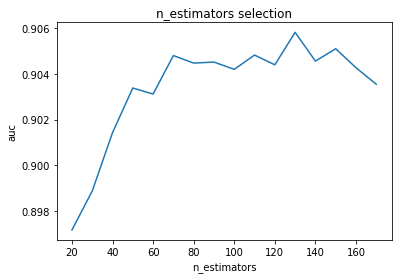

In [57]:
# selection of n_estimators 

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

res_gbm5=pd.DataFrame()

for n_estimators in range(20,171,10):
    gbm5=GradientBoostingClassifier(loss='exponential', learning_rate=0.1, 
            n_estimators=n_estimators, subsample=0.9, criterion='friedman_mse', 
            min_samples_split=10, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
            max_depth=8, min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
            random_state=None, max_features=60, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto').fit(Xtrain,ytrain)
    
    ygbm5=gbm5.predict_proba(Xcv)[:, 1]
    fpr_gbm5, tpr_gbm5, thresholds = metrics.roc_curve(ycv, ygbm5, pos_label=1)

    res_gbm5=res_gbm5.append(pd.DataFrame([{'n_estimators':n_estimators,'auc':metrics.auc(fpr_gbm5, tpr_gbm5)}]))
    
plt.figure(1)
plt.plot(res_gbm5['n_estimators'], res_gbm5['auc'] )
plt.xlabel('n_estimators')
plt.ylabel('auc')
plt.title('n_estimators selection')
plt.show()

In [59]:
res_gbm5

,auc,n_estimators
0,0.897171,20
0,0.898874,30
0,0.901428,40
0,0.903385,50
0,0.903121,60
0,0.904806,70
0,0.904476,80
0,0.904520,90
0,0.904203,100
0,0.904828,110


n_estimators = 130

## 6.6)  gbm Roc curve and festures importance with data test

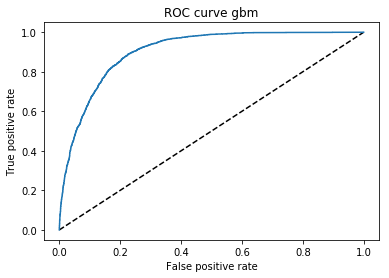

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

gbm=GradientBoostingClassifier(loss='exponential', learning_rate=0.1, 
            n_estimators=130, subsample=0.9, criterion='friedman_mse', 
            min_samples_split=10, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
            max_depth=8, min_impurity_decrease=0.0, min_impurity_split=None, init=None, 
            random_state=None, max_features=60, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto').fit(Xtrain,ytrain)

ygbm=gbm.predict_proba(Xtest)[:, 1]
fpr_gbm, tpr_gbm, thresholds = metrics.roc_curve(ytest, ygbm, pos_label=1)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gbm, tpr_gbm, label='gbm')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve gbm')
plt.show()

In [57]:
print(metrics.auc(fpr_gbm, tpr_gbm))

0.903792236262


In [63]:
feat_imp_gbm=pd.DataFrame(gbm.feature_importances_)
feat_imp_gbm.columns=['importances']
feat_imp_gbm.index=range(1,len(feat_imp_gbm)+1)
feat_imp_gbm['features']=list(Xtrain.columns)
feat_imp_gbm=feat_imp_gbm.sort_values(by=['importances'],ascending=False)
feat_imp_gbm

,importances,features
10,0.131465,BMI
9,0.065499,Wt
7,0.056371,Ins_Age
3,0.039085,Product_Info_4
38,0.038507,Medical_History_2
11,0.034743,Employment_Info_1
35,0.032069,Family_Hist_4
28,0.029871,Insurance_History_5
33,0.027258,Family_Hist_2
34,0.027183,Family_Hist_3


In [64]:
feat_imp_gbm.set_index('features',inplace=True) # To take features like index

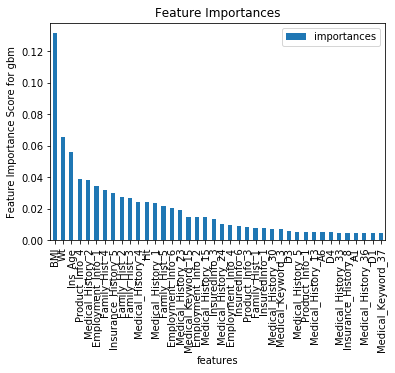

In [65]:
feat_imp_gbm.iloc[:40,:].plot(kind='bar',title='Feature Importances')
plt.ylabel('Feature Importance Score for gbm')
plt.show()

# 7) SVM model 

## 7.1) selection of Kernel 

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics

kernel=['linear','poly','rbf','sigmoid']
res_svm1=pd.DataFrame()

for kern in kernel:
    svm1=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
          decision_function_shape='ovr', degree=3, gamma='auto', kernel=kern,
           max_iter=-1, probability=True, random_state=None, shrinking=True,
           tol=0.001, verbose=False).fit(Xtrain, ytrain)
    
    ysvm1=svm1.predict_proba(Xcv)[:, 1]
    fpr_svm1, tpr_svm1, thresholds = metrics.roc_curve(ycv, ysvm1, pos_label=1)

    res_svm1=res_svm1.append(pd.DataFrame([{'kernel':kern,'auc':metrics.auc(fpr_svm1, tpr_svm1)}]))
    
plt.figure(1)
plt.plot(res_svm1['kernel'], res_svm1['auc'] )
plt.xlabel('kernel')
plt.ylabel('auc')
plt.title('kernel selection')
plt.show()

In [227]:
print(metrics.auc(fpr_svm, tpr_svm))

""


## 7.2) Roc curve 

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics


svm=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
          decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
           max_iter=-1, probability=True, random_state=None, shrinking=True,
           tol=0.001, verbose=False).fit(Xtrain, ytrain)
    
ysvm=svm.predict_proba(Xtest)[:, 1]
fpr_svm, tpr_svm, thresholds = metrics.roc_curve(ytest, ysvm, pos_label=1)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_svm, tpr_svm, label='svm')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve svm')
plt.show()

In [ ]:
print(metrics.auc(fpr_svm, tpr_svm))

# 8) RF + Elasticnet classifier  

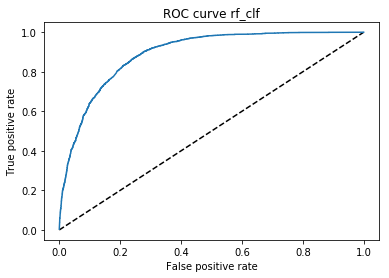

In [91]:
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Xtrain1, Xtrain2, ytrain1, ytrain2 = train_test_split(Xtrain,ytrain,test_size=0.4)

Xtrain2=Xtrain2.append(Xcv)
ytrain2=ytrain2.append(ycv)

rf_enc = OneHotEncoder()
rf_cl.fit(Xtrain1,ytrain1)
rf_enc.fit(rf_cl.apply(Xtrain1))
rf_clf=clf.fit(rf_enc.transform(rf_cl.apply(Xtrain2)), ytrain2)

ypred_rf_clf = rf_clf.predict_proba(rf_enc.transform(rf_cl.apply(Xtest)))[:, 1]
fpr_rf_clf, tpr_rf_clf, _ = metrics.roc_curve(ytest, ypred_rf_clf)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_clf, tpr_rf_clf, label='rf_clf')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve rf_clf')
plt.show()


In [92]:
print(metrics.auc(fpr_rf_clf, tpr_rf_clf))

0.891014851524


# 9) RF + gbm

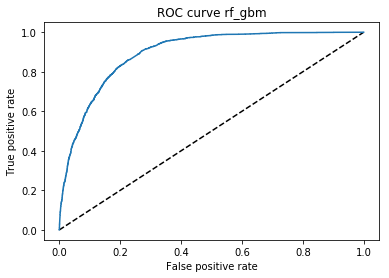

In [485]:
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Xtrain1, Xtrain2, ytrain1, ytrain2 = train_test_split(Xtrain,ytrain,test_size=0.4)

Xtrain2=Xtrain2.append(Xcv)
ytrain2=ytrain2.append(ycv)

rf_enc = OneHotEncoder()
rf_cl.fit(Xtrain1,ytrain1)
rf_enc.fit(rf_cl.apply(Xtrain1))
rf_gbm=gbm.fit(rf_enc.transform(rf_cl.apply(Xtrain2)), ytrain2)

ypred_rf_gbm = rf_gbm.predict_proba(rf_enc.transform(rf_cl.apply(Xtest)))[:, 1]
fpr_rf_gbm, tpr_rf_gbm, _ = metrics.roc_curve(ytest, ypred_rf_gbm)


plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_lr, tpr_rf_lr, label='rf_gbm')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve rf_gbm')
plt.show()


In [100]:
print(metrics.auc(fpr_rf_lr, tpr_rf_lr))

0.894300186862


In [ ]:
from sklearn.linear_model import ElasticNet
alpha = 0.005501
l1_ratio=0.15

enet = ElasticNet(alpha=alpha, copy_X=True, fit_intercept=True, l1_ratio=l1_ratio,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

#we learn in all data to predict Xval
y_pred_enet = enet.fit(Xtrain.append(Xtest), ytrain.append(ytest)).predict(Xval)

In [ ]:
pred_en=pd.DataFrame(y_pred_enet)
pred_en.columns=['pred']
#pred=pred.set_index('pred')
pred_en.index=range(1,len(pred)+1) # change the start of index 

val_id=data_valid2.iloc[:,0]
val_id.columns=['id']
res_en=pd.concat([pred,val_id],axis=1,join='inner')
res_en.head()

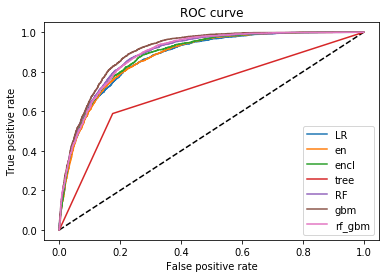

In [486]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')
plt.plot(fpr_en, tpr_en, label='en')
plt.plot(fpr_encl, tpr_encl, label='encl')
plt.plot(fpr_tr, tpr_tr, label='tree')
plt.plot(fpr_rf_cl, tpr_rf_cl, label='RF')
plt.plot(fpr_gbm, tpr_gbm, label='gbm')
plt.plot(fpr_rf_gbm, tpr_rf_gbm, label='rf_gbm')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()